# Machine Learning Regression Analysis

Table of Contents
1. Import Libraries and Data
2. Clean Data
3. Data Prep for Regression Analysis
4. Regression Analysis

## 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/catherinemikelson/Desktop/Career Foundry/Acheivement 6 - Advanced Analytics and Dashboard Design/German Rental Property Analysis/Data/Prepared Data'

In [4]:
df = pd.read_csv(os.path.join(path, 'apt_clean.csv'))

In [5]:
df.head()

,Unnamed: 0,state,utility cost,heating type,new construction,balcony,picturecount,pricetrend,year constructed,kitchen,...,base rent,condition,pets allowed,lift,type of flat,zipcode,number of rooms,garden,district,city
0,0,Nordrhein_Westfalen,245.00,central_heating,False,False,6,4.62,1965.0,False,...,595.0,well_kept,NaN,False,ground_floor,44269,4.0,True,Dortmund,Schüren
1,1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,8,3.47,1871.0,False,...,800.0,refurbished,no,False,ground_floor,67459,3.0,False,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,2,Sachsen,255.00,floor_heating,True,True,8,2.72,2019.0,False,...,965.0,first_time_use,NaN,True,apartment,1097,3.0,False,Dresden,Äußere_Neustadt_Antonstadt
3,3,Sachsen,58.15,district_heating,False,True,9,1.53,1964.0,False,...,343.0,NaN,NaN,False,other,9599,3.0,False,Mittelsachsen_Kreis,Freiberg
4,4,Bremen,138.00,self_contained_central_heating,False,True,19,2.46,1950.0,False,...,765.0,refurbished,NaN,False,apartment,28213,3.0,False,Bremen,Neu_Schwachhausen


## 2. Clean Data

#### The data has already been cleaned.  Minimal outliers were removed, just those that are clearly erronious.

## 3. Data Prep for Regression Analysis

#### Year Constructed vs. Base Rent

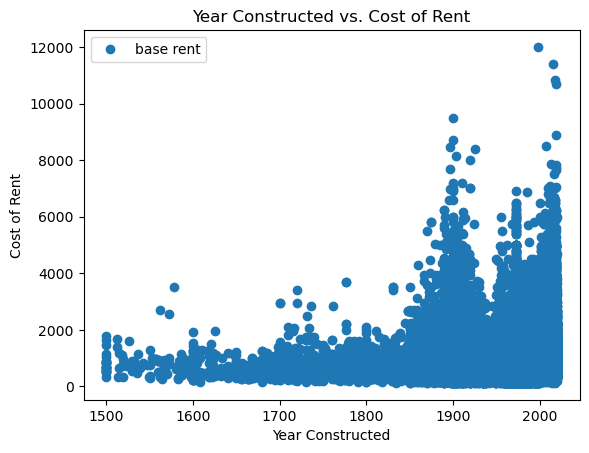

In [6]:
# Create a scatterplot 

df.plot(x = 'year constructed', y='base rent',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Year Constructed vs. Cost of Rent')  
plt.xlabel('Year Constructed')  
plt.ylabel('Cost of Rent')  
plt.show()

#### Note: There is an indication of increased rent prices in more modern builds, however, lower rent prices exists across all years.

#### Number of Rooms v. Base Rent

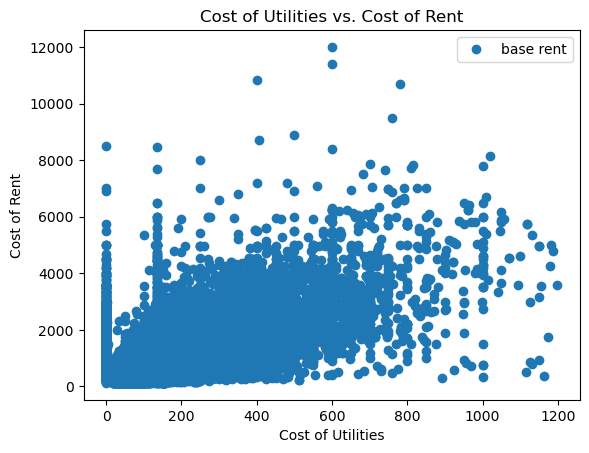

In [7]:
# Create a scatterplot 

df.plot(x = 'utility cost', y='base rent',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Cost of Utilities vs. Cost of Rent')  
plt.xlabel('Cost of Utilities')  
plt.ylabel('Cost of Rent')  
plt.show()

#### While there does seem to be a positive trend, there are many rental units that have no utility cost, which shows many observations at the 0 mark.

#### HYPOTHESIS: As year constructed increases, rent increases.

In [8]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['year constructed'].values.reshape(-1,1)
y = df['base rent'].values.reshape(-1,1)

In [9]:
X

array([[1965.],
       [1871.],
       [2019.],
       ...,
       [1965.],
       [2019.],
       [1972.]])

In [10]:
y

array([[595.],
       [800.],
       [965.],
       ...,
       [650.],
       [840.],
       [935.]])

In [11]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis

In [12]:
# Create a regression object.

regression = LinearRegression()

In [13]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

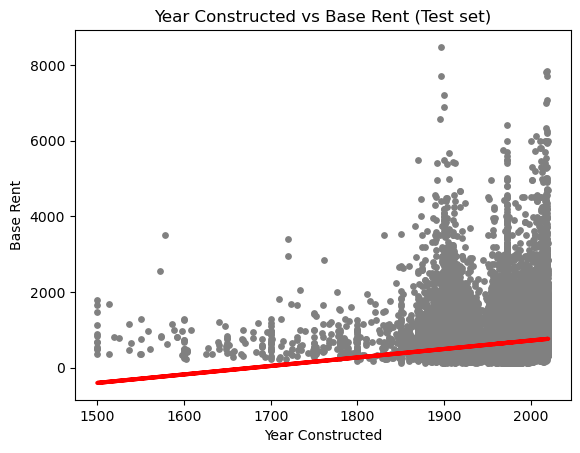

In [15]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Year Constructed vs Base Rent (Test set)')
plot_test.xlabel('Year Constructed')
plot_test.ylabel('Base Rent')
plot_test.show()

#### Note: The trend line does not fit the data points well, espeically the higher rents.  The points are too widely variable in rent cost.  

In [16]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [17]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.24118195]]
Mean squared error:  233912.15201585626
R2 score:  0.030107965058405073


In [18]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,421.45,667.243825
1,250.00,638.108460
2,261.00,494.672815
3,356.50,510.361089
4,435.00,658.279098
5,357.00,658.279098
6,1118.40,759.132285
7,184.12,680.690917
8,670.00,638.108460
9,420.00,658.279098


In [19]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,421.45,667.243825
1,250.00,638.108460
2,261.00,494.672815
3,356.50,510.361089
4,435.00,658.279098
5,357.00,658.279098
6,1118.40,759.132285
7,184.12,680.690917
8,670.00,638.108460
9,420.00,658.279098


#### Note: The MSE is very high, not a reasonable level for this dataset.  The R2 score is also very low.  The actual vs. predicted values for this set are way off.  This is not a successful model for this data set.  